# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [6]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [7]:
# Merge the difference with the original dataframe
df = pd.merge(df, diff, on='id', how='left')

# Calculate the duration of the contract
df['contract_duration'] = ((df['date_end'] - df['date_activ']).dt.days/ 30).astype(int)

# Calculate the time since the last modification of the product
df['month_modif_renewal'] = ((df['date_renewal'] - df['date_modif_prod']).dt.days/ 30).astype(int)

# Calculate the number of months the client has been active
df['months_active_renewal'] = ((df['date_renewal'] - df['date_activ']).dt.days / 30).astype(int)

# Feature engineering based on price data
# Mean of off-peak prices for each client
mean_offpeak_price = price_df.groupby('id')['price_off_peak_var'].mean().reset_index()
df = pd.merge(df, mean_offpeak_price, on='id', how='left')

# Max of off-peak prices for each client
max_offpeak_price = price_df.groupby('id')['price_off_peak_var'].max().reset_index()
df = pd.merge(df, max_offpeak_price, on='id', how='left')

# Min of off-peak prices for each client
min_offpeak_price = price_df.groupby('id')['price_off_peak_var'].min().reset_index()
df = pd.merge(df, min_offpeak_price, on='id', how='left')


# Price volatility
price_std = price_df.groupby('id')['price_off_peak_var'].std().reset_index()
df = pd.merge(df, price_std.rename(columns={'price_off_peak_var': 'price_off_peak_var_std'}), on='id', how='left')


# Fill NaN values with 0 (or use a more sophisticated imputation strategy if appropriate)
df.fillna(0, inplace=True)

# Display first few rows to check the newly created features
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,contract_duration,month_modif_renewal,months_active_renewal,price_off_peak_var_x,price_off_peak_var_y,price_off_peak_var,price_off_peak_var_std
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,36,-4,24,0.124787,0.146033,0.117479,0.007829
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,-0.003767,0.177779,85,73,73,0.149609,0.151367,0.146033,0.002212
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,-0.004670,0.177779,73,60,60,0.170512,0.172468,0.167798,0.002396
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,-0.004547,0.177779,73,60,60,0.151210,0.153133,0.148586,0.002317
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,-0.006192,0.162916,74,62,62,0.124174,0.128067,0.119906,0.003847


Data Transformation

In [8]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,contract_duration,month_modif_renewal,months_active_renewal,price_off_peak_var_x,price_off_peak_var_y,price_off_peak_var,price_off_peak_var_std
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.020057,3.700961,36,-4,24,0.124787,0.146033,0.117479,0.007829
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,-0.003767,0.177779,85,73,73,0.149609,0.151367,0.146033,0.002212
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,-0.004670,0.177779,73,60,60,0.170512,0.172468,0.167798,0.002396
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,-0.004547,0.177779,73,60,60,0.151210,0.153133,0.148586,0.002317
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,-0.006192,0.162916,74,62,62,0.124174,0.128067,0.119906,0.003847


In [9]:
columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
df.drop(columns=columns, inplace = True)

In [10]:
df['has_gas'].unique()

array(['t', 'f'], dtype=object)

### Convert boolean data



In [11]:
df['has_gas'] = df['has_gas'].replace({'f': 0, 't': 1})

### Convert categorical data

In [12]:
df['channel_sales'].value_counts()

,count
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,6754
MISSING,3725
lmkebamcaaclubfxadlmueccxoimlema,1843
usilxuppasemubllopkaafesmlibmsdf,1375
ewpakwlliwisiwduibdlfmalxowmwpci,893
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [13]:
# One-hot encode 'id' column
channel_dummies = pd.get_dummies(df['channel_sales'], prefix='channel')

# Concatenate one-hot encoded columns with original DataFrame
df = pd.concat([df, channel_dummies], axis=1)

# convert channel values from true/false to 1/0
for column in channel_dummies.columns:
    df[column] = df[column].astype(int)

# Drop the original 'channel_sales' column as well as the three channels that have less than 11 rows
df = df.drop(columns = ['channel_sales','channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa'], axis=1)

# Display first few rows to check the changes
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_active_renewal,price_off_peak_var_x,price_off_peak_var_y,price_off_peak_var,price_off_peak_var_std,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,24,0.124787,0.146033,0.117479,0.007829,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,73,0.149609,0.151367,0.146033,0.002212,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,60,0.170512,0.172468,0.167798,0.002396,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,60,0.151210,0.153133,0.148586,0.002317,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,62,0.124174,0.128067,0.119906,0.003847,1,0,0,0,0


In [14]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_active_renewal,price_off_peak_var_x,price_off_peak_var_y,price_off_peak_var,price_off_peak_var_std,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,24,0.124787,0.146033,0.117479,0.007829,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,73,0.149609,0.151367,0.146033,0.002212,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,60,0.170512,0.172468,0.167798,0.002396,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,60,0.151210,0.153133,0.148586,0.002317,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,62,0.124174,0.128067,0.119906,0.003847,1,0,0,0,0


In [15]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       

In [16]:
df['origin_up'].value_counts()

,count
origin_up,
lxidpiddsbxsbosboudacockeimpuepw,7097
kamkkxfxxuwbdslkwifmmcsiusiuosws,4294
ldkssxwpmemidmecebumciepifcamkci,3148
MISSING,64
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [17]:
# One-hot encode 'id' column
channel_dummies = pd.get_dummies(df['origin_up'], prefix='origin_up')

# Concatenate one-hot encoded columns with original DataFrame
df = pd.concat([df, channel_dummies], axis=1)

# convert channel values from true/false to 1/0
for column in channel_dummies.columns:
    df[column] = df[column].astype(int)

# Drop the original 'channel_sales' column as well as the three channels that have less than 11 rows
df = df.drop(columns = ['origin_up','origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp','origin_up_ewxeelcelemmiwuafmddpobolfuxioce'], axis=1)

df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,price_off_peak_var,price_off_peak_var_std,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0.117479,0.007829,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0.146033,0.002212,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0.167798,0.002396,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.148586,0.002317,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0.119906,0.003847,1,0,0,0,0,1,0,0


In [18]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'offpeak_diff

### Transform numerical data

In [19]:
# transform skewed data

skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [20]:
# Apply log
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [21]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


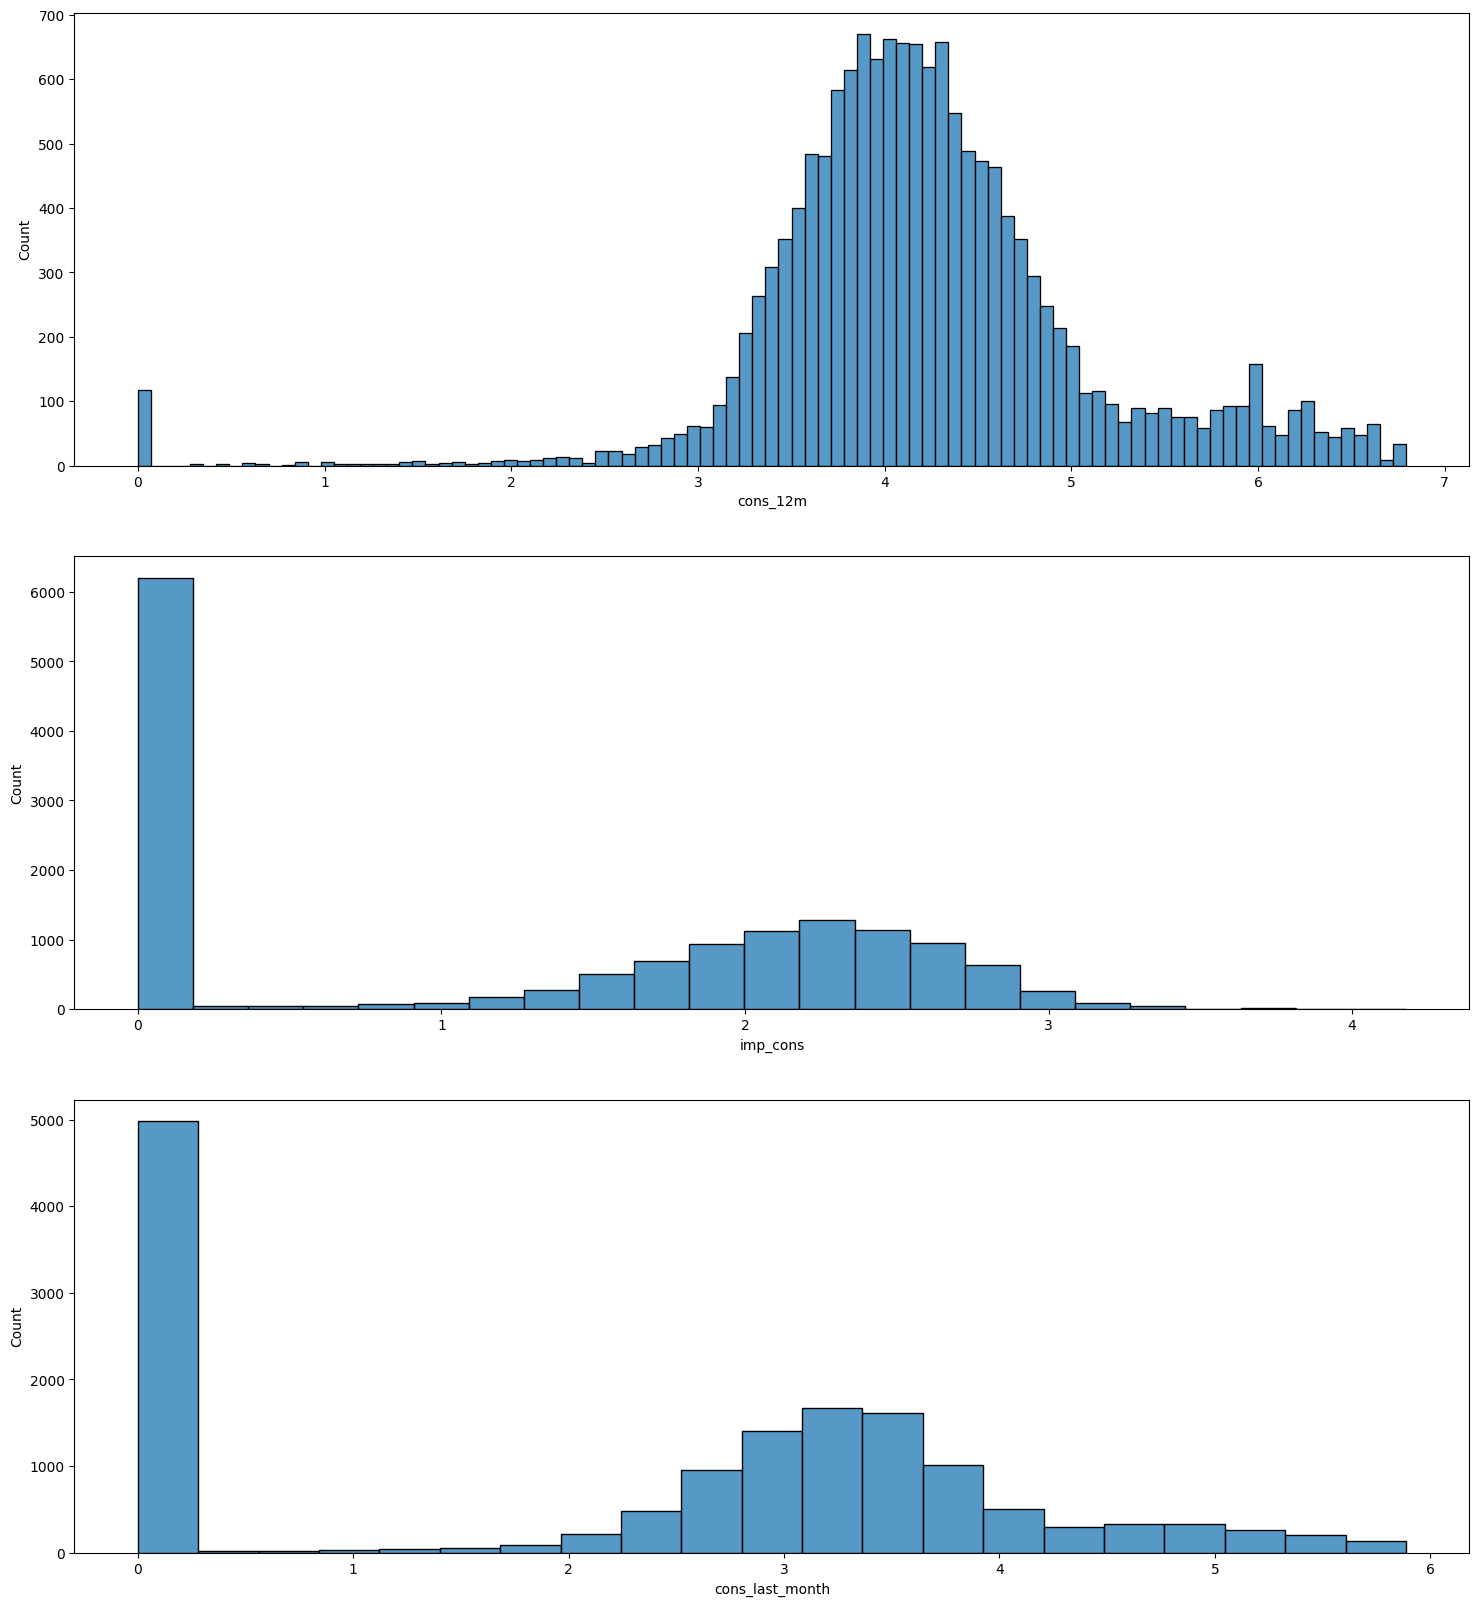

In [22]:
# plots after logorization
fig, axs = plt.subplots(nrows = 3, figsize=(18, 20))
sns.histplot(df['cons_12m'].dropna(), ax=axs[0])
sns.histplot(df['imp_cons'].dropna(), ax=axs[1])
sns.histplot(df['cons_last_month'].dropna(), ax=axs[2])
plt.show()


### Remove correlated features

In [23]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'offpeak_diff

In [24]:
# drop the non-numerical column id
correlation_matrix = df.drop(columns=['id']).corr()
correlation_matrix

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,price_off_peak_var,price_off_peak_var_std,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
cons_12m,1.000000,0.209637,0.623493,0.557186,0.321928,-0.028437,0.201488,-0.144678,0.277831,-0.162694,...,-0.131710,0.008024,-0.084505,-0.064549,-0.021040,0.300029,-0.125876,0.032191,-0.026175,-0.006561
cons_gas_12m,0.209637,1.000000,0.171077,0.108450,0.084575,0.001444,0.063462,-0.041916,0.075684,-0.030439,...,-0.040561,0.016331,0.030565,-0.008177,-0.046458,0.048664,-0.014001,0.000443,0.001582,-0.002899
cons_last_month,0.623493,0.171077,1.000000,0.292725,0.786051,-0.015106,0.326362,-0.236935,0.396657,-0.162611,...,-0.217534,0.042813,-0.058077,-0.066062,0.010777,0.205685,-0.111115,-0.031805,-0.023550,0.049516
forecast_cons_12m,0.557186,0.108450,0.292725,1.000000,0.361325,0.056053,0.222187,0.047935,0.220189,0.101439,...,0.080339,0.039026,-0.099932,-0.006704,0.055963,0.081416,-0.034369,-0.031513,-0.020166,0.046185
forecast_cons_year,0.321928,0.084575,0.786051,0.361325,1.000000,0.014451,0.391082,-0.296602,0.431537,-0.194797,...,-0.279362,0.064408,-0.035257,-0.034238,0.057864,0.038128,-0.062021,-0.097037,-0.012083,0.099111
forecast_discount_energy,-0.028437,0.001444,-0.015106,0.056053,0.014451,1.000000,-0.007037,0.353735,0.059318,0.048024,...,0.147559,0.404472,-0.037363,-0.008408,0.052629,-0.052703,0.033448,-0.059725,-0.029638,0.077559
forecast_meter_rent_12m,0.201488,0.063462,0.326362,0.222187,0.391082,-0.007037,1.000000,-0.429786,0.651989,-0.106109,...,-0.401949,0.132490,-0.008968,-0.006481,0.035963,0.018300,-0.062369,-0.058502,0.053057,0.010821
forecast_price_energy_off_peak,-0.144678,-0.041916,-0.236935,0.047935,-0.296602,0.353735,-0.429786,1.000000,-0.330138,0.630377,...,0.854236,0.168197,-0.076024,0.018956,-0.006813,0.011611,0.096691,0.120547,-0.081068,-0.043863
forecast_price_energy_peak,0.277831,0.075684,0.396657,0.220189,0.431537,0.059318,0.651989,-0.330138,1.000000,-0.242017,...,-0.345075,0.195619,0.018551,-0.017470,-0.020519,0.092435,-0.083181,-0.007883,0.053993,-0.038138
forecast_price_pow_off_peak,-0.162694,-0.030439,-0.162611,0.101439,-0.194797,0.048024,-0.106109,0.630377,-0.242017,1.000000,...,0.605656,0.014486,-0.033718,0.006491,0.009162,-0.023254,0.055977,0.064311,-0.005938,-0.055459


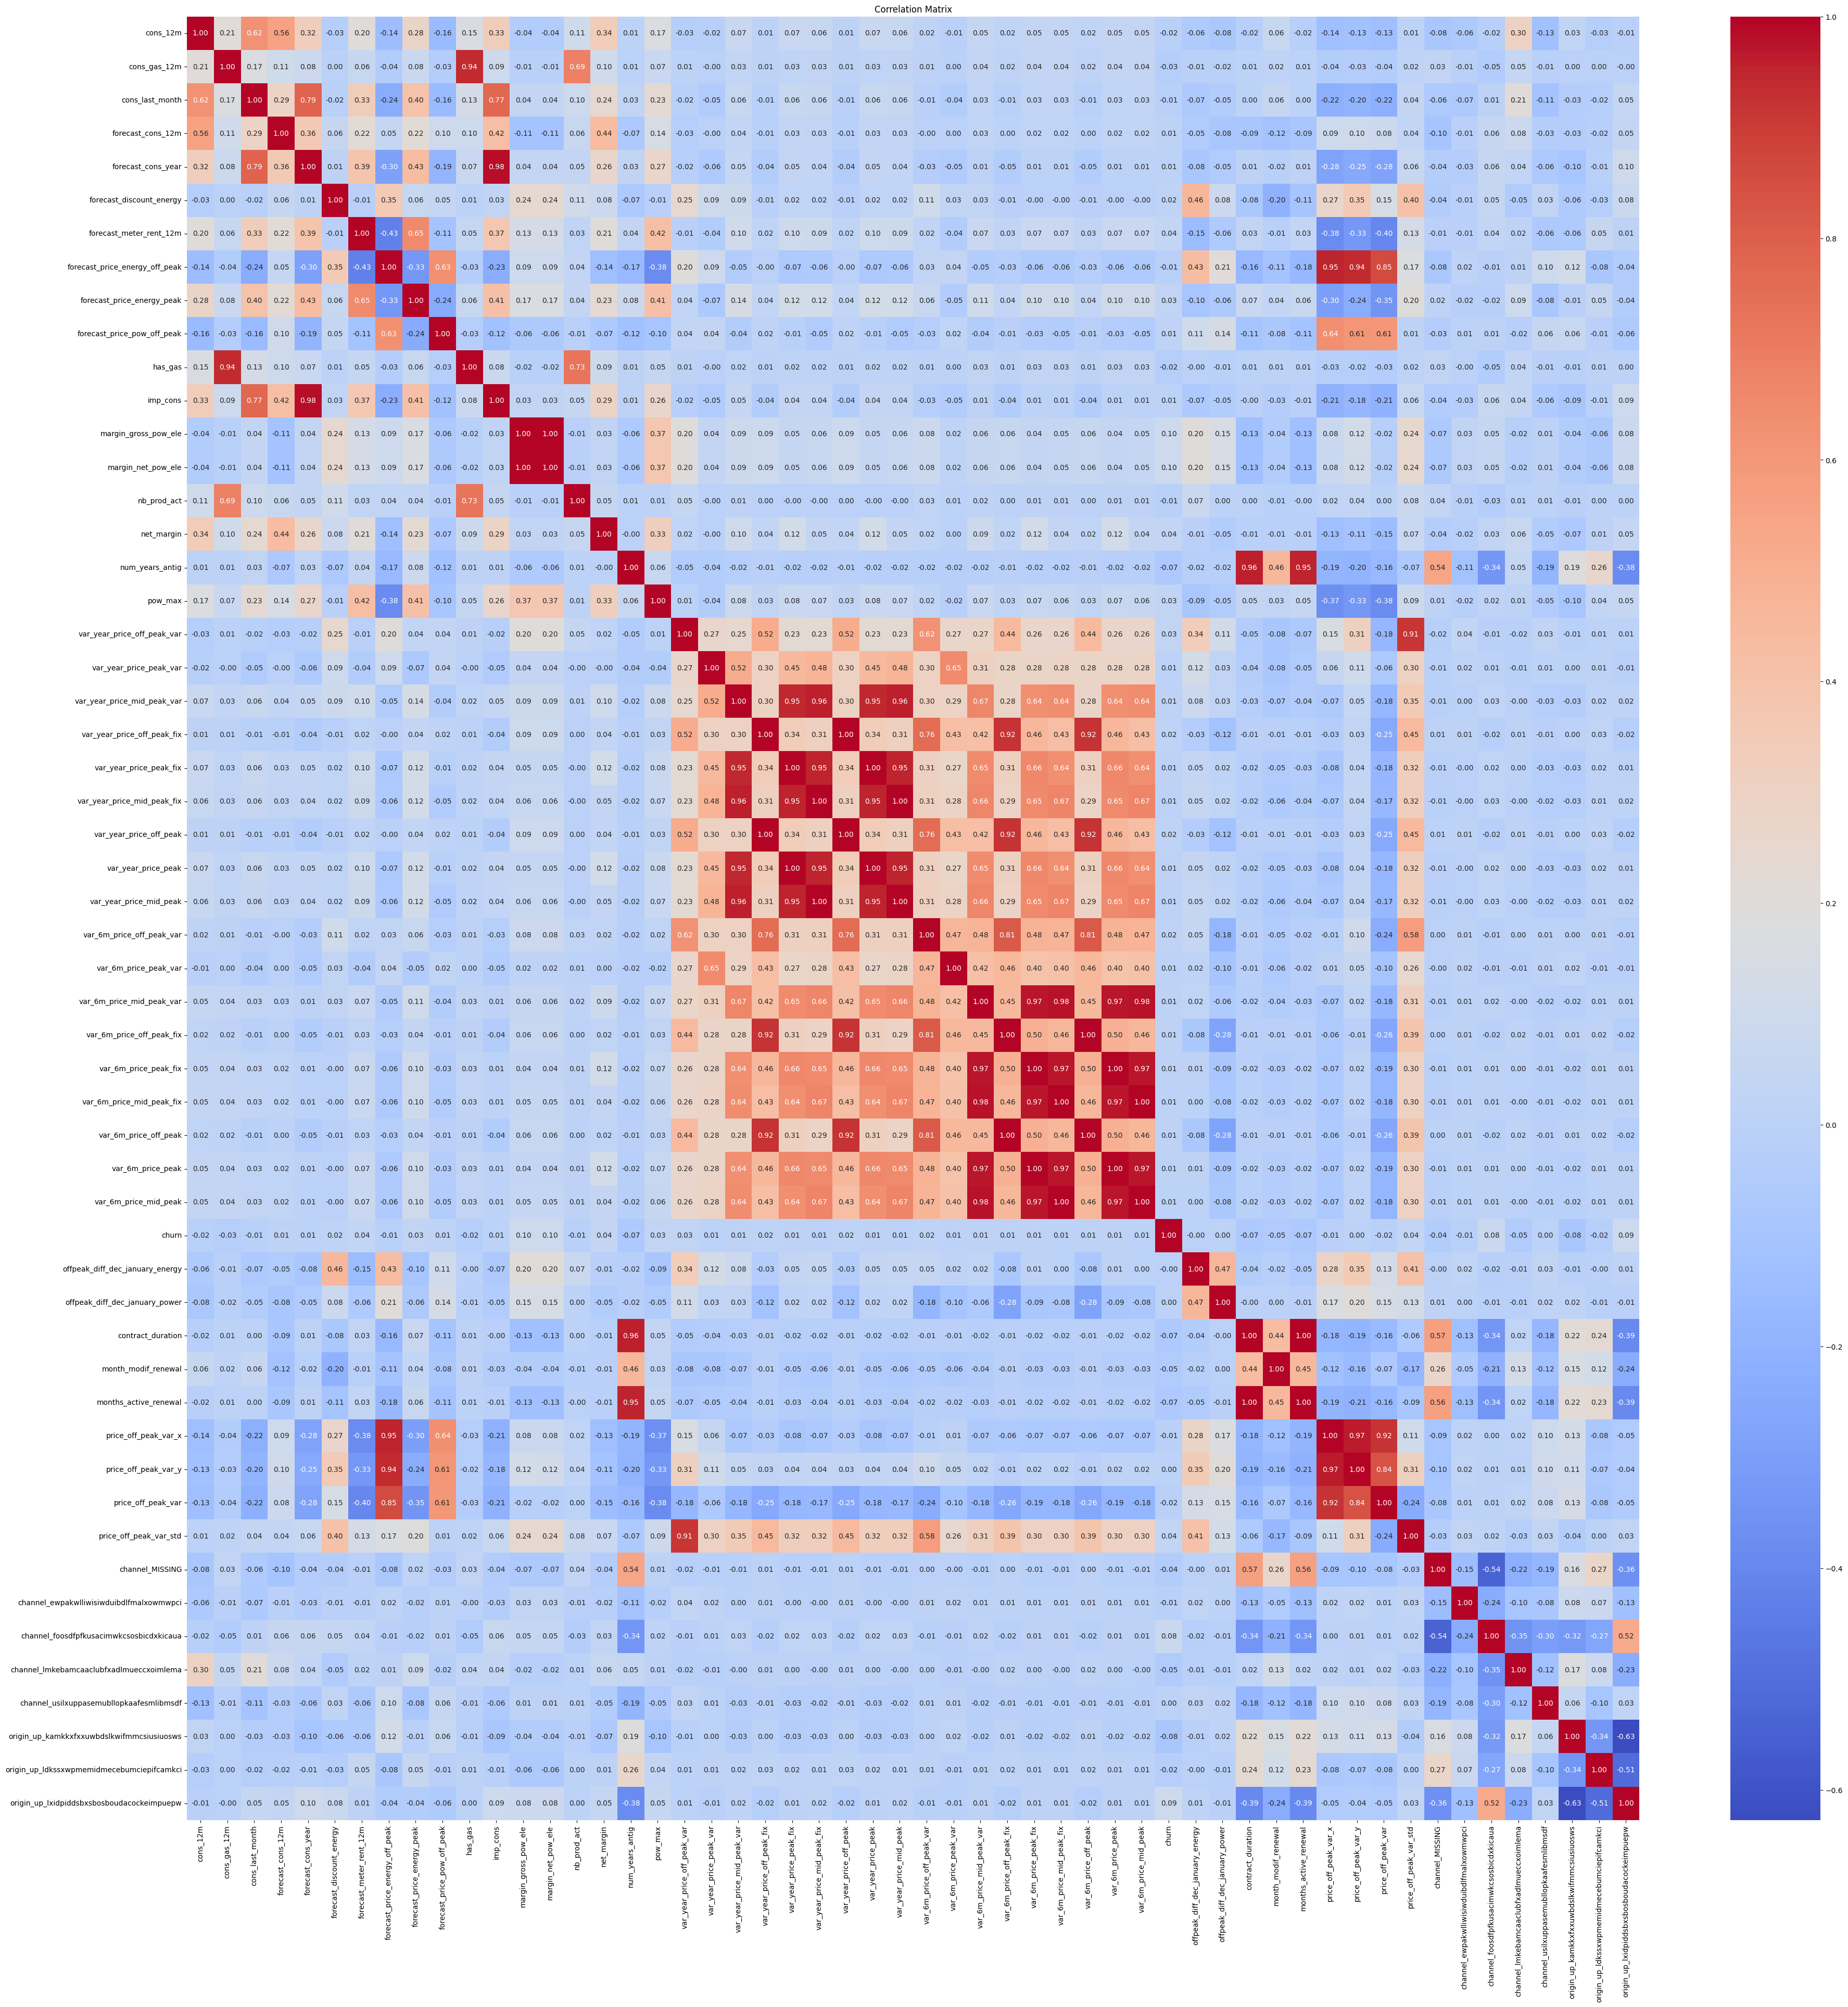

In [25]:
# Plot the heatmap
plt.figure(figsize=(45, 45))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
# remove highly correlated features

# Set a threshold for correlation
threshold = 0.95

# Identify highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Highly Correlated Features:")
print(len(correlated_features))
print(correlated_features)


Highly Correlated Features:
15
{'price_off_peak_var_y', 'var_year_price_peak', 'contract_duration', 'price_off_peak_var_x', 'var_6m_price_mid_peak_fix', 'var_year_price_mid_peak_fix', 'var_6m_price_mid_peak', 'imp_cons', 'var_year_price_mid_peak', 'var_6m_price_off_peak', 'var_6m_price_peak', 'margin_net_pow_ele', 'months_active_renewal', 'var_year_price_off_peak', 'var_6m_price_peak_fix'}


Note: The feature engineering has higher precision than the reference features.